## Overview

In this homework, you'll be applying the K-nearest neighbor (KNN) classification algorithm to a real-world machine learning data set. In particular, we will predict the affordability of a car given a diverse set of features, including the make, engine type, style,  and horsepower and other descriptive properties of the car.

Firstly, you will read in the dataset into a train and a test set, and you will create two feature sets (Q1). Secondly, you will implement different distance functions (Q2). Thirdly, you will implement one KNN classifier (Q3, Q4) and apply it to the data set using different distance functions and parameter K (Q5). Finally, you will assess the quality of your classifier by comparing its class predictions to the gold standard labels (Q6).




# Question 1: Loading the data

**Instructions:** For this assignment we will develop a K-Nearest Neighbors (KNN) classifier to predict the 
affordability of cars. The list of classes is:

```
cheap
affordable
expensive
very expensive
```

We use a modified version of the Car data set from the UCI Machine learning repository.

The original data can be found here: https://archive.ics.uci.edu/ml/datasets/Automobile

The dataset consists of 204 instances. Each instance corresponds to a car which has a unique identifier (X; first field) and is characterized with 24 features as described in the file *car.names* which is provided as part of this assignment.

You need to first obtain this dataset, which is on Canvas (assignment 1). The files *car.features* and *car.labels* contain the data we will use in this notebook. Make sure the files are saved in the same folder as this notebook. 

Both files are in comma-separated value format. The first line in each file is a header, naming each feature (or label).

*car.features* contains 204 instances, one line per instance. The first field is the unique instance identifier. The following fields contain the 24 features, as described in the file *car.names*.

*car.labels* contains the gold labels (i.e., one of the four classes above), one instance per line. Again, the first field is the instance identifier, and the second field the instance label.

*car.names* contains additional explanations about the data set and the features.

All feature values are floats, and for Questions 1 through 5, we make the simplifying assumption that all values are indeed real-valued. You may want to revisit this assumption in Question 6.



**Task**: Read the two files  
1. create a **training_feature** set (list of features for the first 163 instances in the car.* files) and a **training_label** set (list of labels for the corresponding). 
2. create a **test_feature** set (list of features of the remaining instances in the car.* files) and a **test_label** set (list of labels for the corresponding). 
---------
- Do **not** shuffle the data.
- Do **not** modify feature or label representations. 
- Features must be represented as floats.
--------
You may use any Python packages you want, but not change the specified data types (i.e., they should be of type List, and *not* dataframe, dictionary etc).

In [1]:
data = open("car.features", 'r').readlines()
labels = open("car.labels", 'r').readlines()

#To get the first 163 as training then remaining as test
train_features = []
train_labels   = []
test_features = []
test_labels   = []


###########################
## YOUR CODE BEGINS HERE
data = [row.strip().split(',') for row in data[1:]]
data = [[float(val) for val in row] for row in data]

labels = labels[1:]
labels = [row.strip().split(',')[1] for row in labels]

train_features = data[:160]
train_labels = labels[:160]
test_features = data[161:]
test_labels = labels[161:]
## YOUR CODE ENDS HERE
###########################

print("number of train/test instances:",len(train_features), len(test_features))
print("number of train/test features:",len(train_features[40]), len(test_features[1]))


number of train/test instances: 160 43
number of train/test features: 25 25


### Question 2: Distance Functions

<b>Instructions</b>: Implement the three distance functions specified below. 

1. Euclidean distance
2. Cosine distance
3. Chebyshev distance, defined as:
    
    $d(x,y)=\max_{i}|x_i-y_i|$
    

Each distance function takes as input
- Two feature vectors (each of type List)

and returns as output
- The distance between the two feature vectors (float)

------------

Use <b>only</b> the library imported below, i.e., <b>do not</b> use implementations from any other Python library. 

In [2]:
import math


def euclidean_distance(fw1, fw2):
    
    distance = 0
    for x1,x2 in zip(fw1,fw2):
        distance = distance + (x1-x2)**2
    
    distance = math.sqrt(distance)
    
    return distance


def cosine_distance(fw1, fw2):
    "cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for x,y in zip(fw1,fw2):
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    distance = sumxy/math.sqrt(sumxx*sumyy)
    
    return distance


def chebyshev_distance(fw1, fw2):
    # insert code here
    distance = 0
    dist = []
    for x,y in zip(fw1,fw2):
        dist.append(abs(x-y))
        
    distance = max(dist)
    return distance

###########################
## YOUR CODE ENDS HERE
###########################

print(round(euclidean_distance(train_features[100],test_features[2]), 5))
print(round(chebyshev_distance(train_features[100],test_features[2]), 5))
print(round(cosine_distance(train_features[100],test_features[2]), 5))



167.64847
150.0
0.99989


### Question 3: KNN Classifier

<b>Instructions</b>: Here, you implement your KNN classifier. It takes as input 
- training data features
- training data labels
- test data features
- parameter K
- distance function(s) based on which nearest neighbors will be identified

It returns as output 
- the predicted labels for the test data

**Ties among distances**. If there are more than K instances with the same (smallest) distance value, consider the first K. For example, for K=1 if you have 3 instances (with identifiers i = 3, 12, 54) that all have the same distance to your test instance (e.g., 0.641), the instance with the smallest identifier should be selected as the nearest neighbor (in this case i = 3).

**Ties at prediction time.** Ties can also occur at class prediction time when two (or more) classes are supported by the same number of neighbors. In that case choose the class of the 1 nearest neighbor. The "1 nearest neighbor" refers only to those classes represented with the maximum support in the neighborhood. E.g., for K = 5, with a neighborhood ordered by distance: {'cheap', 'expensive', 'affordable', expensive', 'affordable'} you would choose the 1 nearest neighbor among {'expensive','affordable'}.

-----------

**You should implement the classifier from scratch yourself**, i.e., <b> you must not</b> use an existing implementation in any Python library. You may use Python packages (e.g., math, numpy, collections, ...) to help with your implementation.

In [3]:
# distances=[np.apply_along_axis(lambda x:euclidean_distance(x,test_case), 1, train_features_array) for test_case in test_features] # apply dist_fun to each test_case for every training instance

In [4]:
# sorted_distances_with_labels = [zip(*sorted(zip(distance,train_labels))) for distance in distances]

In [5]:
# a,b = list(sorted_distances_with_labels[0])

In [6]:
# weights = 1/(np.array(a[:5])+0.000001)

In [7]:
# pd.DataFrame({'weights':weights,'labels':b[:5]}).groupby('labels').sum().idxmax().values[0]

In [8]:
# pd.DataFrame({'weights':weights,'labels':b[:5]}).groupby('labels').sum().idxmax().values[0]

In [9]:
# k = 3
# max(b[:k],key=b[:k].count)

In [10]:
# from collections import Counter

In [11]:
# d = Counter(b[:1])
# sorted(d.items(),key=lambda x: x[1],reverse=True)[0][0]

In [12]:
import numpy as np
import pandas as pd
def KNN(train_features, train_labels, test_features, k, dist_fun, weighted=False):
    
    predictions = []
    
    ###########################
    ## Your answer BEGINS HERE
    ###########################


    
    epsilon = 0.000001
    train_features_array = np.array(train_features)   #convert to numpy array to use numpy functions
    distances=[np.apply_along_axis(lambda x:dist_fun(x,test_case), 1, train_features_array) for test_case in test_features] # apply dist_fun to each test_case for every training instance
    sorted_distances_with_labels = [zip(*sorted(zip(distance,train_labels))) for distance in distances] # Sort the distances with labels. Ties among distances is handled with this automatically by sorted(no need to do it manually)
    if weighted:
        for sdl in sorted_distances_with_labels: # for each sorted list of distances with labels (for each test instance)
            d,l=sdl #d is the distance, l is the label
            weights = 1/(np.array(d[:k])+epsilon) # weights are 1/(distance + epsilon)
            answer = pd.DataFrame({'weights':weights,'labels':l[:k]}).groupby('labels').sum().idxmax().values[0] # get the label with the highest weight
            predictions.append(answer) # append the answer to the predictions list
    else:
        for sdl in sorted_distances_with_labels:
            d,l=sdl #d is the distance, l is the label
            predictions.append(max(l[:k],key=l[:k].count)) # get the label with the highest count. Ties at prediction time are handled with this automatically by max(no need to do it manually)
    
            
            
    ###########################
    ## Your answer ENDS HERE
    ###########################
        
    return predictions


### Question 4: Weighted KNN Classifier 

<b>Instructions</b>: Extend your implementation of the KNN classifier in Question 3 to a Weighted KNN classifier. You should change the code in the cell above. Use Inverse Distance as weights:

$w_j=\frac{1}{d_j+\epsilon}$

where

- $d_j$ is the distance of of the jth nearest neighbor to the test instance
- $\epsilon=0.000001$

Use the Boolean parameter `weighted` to specify the KNN version when calling the function.

### Question 5: Applying your KNN classifiers to the Car Dataset 

**Using the functions you have implemented above, please**

<b> 1. </b>
For each of the distance functions you implemented in Question 2, construct (a) Nine majority voting KNN classifiers and (b) Nine weighted KNN classifiers, respectively, with 

- K=1
- K=5
- k=20

You will obtain a total of 18 (3 distance functions x 3 K values x 2 KNN versions) classifiers.

<b> 2. </b>
Compute the test accuracy for each model, where the accuracy is the fraction of correctly predicted labels over all predictions. Use the `accuracy_score` function from the `sklearn.metrics` package to obtain your accuracy.


In [13]:
from sklearn.metrics import accuracy_score

########################
# Your code STARTS HERE
########################





accuracy_knn_euc_1 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, euclidean_distance))
accuracy_knn_euc_5 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, euclidean_distance))
accuracy_knn_euc_20 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 20, euclidean_distance))
 
accuracy_knn_euc_1_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, euclidean_distance, True))
accuracy_knn_euc_5_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, euclidean_distance, True))
accuracy_knn_euc_20_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 20, euclidean_distance, True))

accuracy_knn_cos_1 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, cosine_distance))
accuracy_knn_cos_5 =  accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, cosine_distance))
accuracy_knn_cos_20 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 20, cosine_distance))

accuracy_knn_cos_1_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, cosine_distance, True))
accuracy_knn_cos_5_w =  accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, cosine_distance, True))
accuracy_knn_cos_20_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 20, cosine_distance, True))

accuracy_knn_che_1 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, chebyshev_distance))
accuracy_knn_che_5 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, chebyshev_distance))
accuracy_knn_che_20 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 20, chebyshev_distance))
 
accuracy_knn_che_1_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, chebyshev_distance, True))
accuracy_knn_che_5_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, chebyshev_distance, True))
accuracy_knn_che_20_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 20, chebyshev_distance, True))

########################
# Your code ENDS HERE
########################



print("Results on the *full* feature set")

print("\neuclidean (majority vote)")
print("K=1", round(accuracy_knn_euc_1, 3))
print("K=5", round(accuracy_knn_euc_5, 3))
print("K=20", round(accuracy_knn_euc_20, 3))

print("-----------\neuclidean (weighted)")
print("K=1", round(accuracy_knn_euc_1_w, 3))
print("K=5", round(accuracy_knn_euc_5_w, 3))
print("K=20", round(accuracy_knn_euc_20_w, 3))

print("\ncosine (majority vote)")
print("K=1", round(accuracy_knn_cos_1, 3))
print("K=5", round(accuracy_knn_cos_5, 3))
print("K=20", round(accuracy_knn_cos_20, 3))

print("-----------\ncosine (weighted)")
print("K=1", round(accuracy_knn_cos_1_w, 3))
print("K=5", round(accuracy_knn_cos_5_w, 3))
print("K=20", round(accuracy_knn_cos_20_w, 3))

print("\nchebyshev (majority vote)")
print("K=1", round(accuracy_knn_che_1, 3))
print("K=5", round(accuracy_knn_che_5, 3))
print("K=20", round(accuracy_knn_che_20, 3))

print("-----------\nchebyshev (weighted)")
print("K=1", round(accuracy_knn_che_1_w, 3))
print("K=5", round(accuracy_knn_che_5_w, 3))
print("K=20", round(accuracy_knn_che_20_w, 3))




Results on the *full* feature set

euclidean (majority vote)
K=1 0.395
K=5 0.558
K=20 0.512
-----------
euclidean (weighted)
K=1 0.395
K=5 0.535
K=20 0.605

cosine (majority vote)
K=1 0.256
K=5 0.302
K=20 0.209
-----------
cosine (weighted)
K=1 0.256
K=5 0.302
K=20 0.209

chebyshev (majority vote)
K=1 0.372
K=5 0.395
K=20 0.488
-----------
chebyshev (weighted)
K=1 0.372
K=5 0.442
K=20 0.558


### Question 6: Analysis

1. Consider the following features: make, fuel-type, body-style, and num-of-doors. Assume we intend to use KNN with euclidean distance, for each of the above features, would you change the approach we chose to convert nominal to numeric features? If yes, explain what approach you would select and discuss one benefit and one drawback of your proposed approach.

    
2. Consider these two sets of attributes: (curb-weight,engine-size) and (compression-ratio, peak-rpm)

    (a) For each set of features, create a scatter plot of data points coloring instances from each class differently. You should produce **two plots** which show the scattered data points colored by class label. Label the x-axis and y-axis. [*N.B. you may use libraries like <a href="https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py">matplotlib</a> or <a href="https://seaborn.pydata.org/introduction.html">seaborne</a>*] 
    
    (b) Which feature set is more informative in the context of this classification task and why?
    
    (c) What do you observe about the relationship between features in each feature set and how did you come to that conclusion?
    
    
3. Discuss the appropriateness of each of the distance functions for our *car* data set. Where appropriate, explain why you expect them to perform poorly referring to both their mathematical properties and the given feature set. 

    

4. Does the Weighted KNN outperform the Majority voting version, or vice versa? Hypothesize why (not). 



5. Do you think the accuracy is an appropriate evaluation metric for the *car* data set? Why (not)? 

 

<b>Each question should be answered in no more than 3-4 sentences.</b>






1

2

*Type code for 2.(a) in the cell below, and answer 2.(b) and 2.(c) below*

2b)

2c)

3

4

5


In [65]:
import matplotlib.pyplot as plt

################################################
# Your answer to Question 6 (2) STARTS HERE
################################################




################################################
# Your answer to Question 6 (2) ENDS HERE
################################################


In [9]:
x = train_features[0:162]
y = train_labels
curb_weight_instances = list(map(lambda x:x[16],x))
engine_size_instances = list(map(lambda x:x[13],x))
compression_ratio_instances = list(map(lambda x:x[20],x))
peak_rpm_instances = list(map(lambda x:x[22],x))


In [61]:
classes = list(set(y))
curb_weight_by_cls =[[] for i in range(len(classes))]
engine_size_by_cls = [[] for i in range(len(classes))]
compression_ratio_by_cls =[[] for i in range(len(classes))]
peak_rpm_by_cls =[[] for i in range(len(classes))]

for i in range(len(y)):
    for ci, c in enumerate(classes):
        if y[i] == c:
            curb_weight_by_cls[ci].append(curb_weight_instances[i])
            engine_size_by_cls[ci].append(engine_size_instances[i])
            compression_ratio_by_cls[ci].append(compression_ratio_instances[i])
            peak_rpm_by_cls[ci].append(peak_rpm_instances[i])


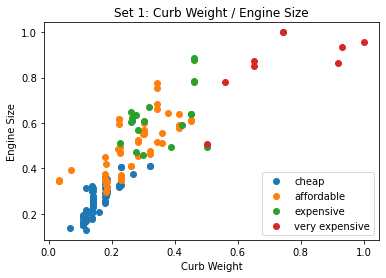

In [69]:
for ci, c in enumerate(classes):
#     print(len(curb_weight_by_cls[ci]), len( engine_size_instances[ci]))
    plt.scatter(curb_weight_by_cls[ci], engine_size_by_cls[ci], label=c)
plt.legend()
plt.title("Set 1: Curb Weight / Engine Size")
plt.xlabel("Curb Weight")
plt.ylabel("Engine Size")
plt.show()

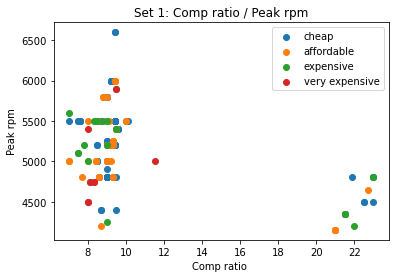

In [70]:
for ci, c in enumerate(classes):
#     print(len(curb_weight_by_cls[ci]), len( engine_size_instances[ci]))
    plt.scatter(compression_ratio_by_cls[ci], peak_rpm_by_cls[ci], label=c)
plt.legend()
plt.title("Set 1: Comp ratio / Peak rpm")
plt.xlabel("Comp ratio ")
plt.ylabel("Peak rpm")
plt.show()